In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from math import sin, cos, pi, sqrt;
import matplotlib.patches as patches

import math
from scipy import integrate


(600, 12) (601, 12) (600, 15) (601, 15)
(608, 8) (609, 8) (608, 10) (609, 10)
608
353.5533905932738
609
353.5533905932738
не долетел


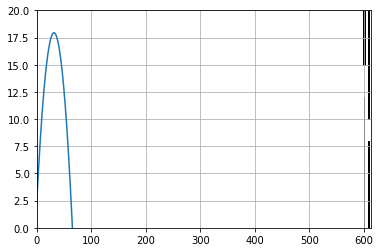

In [26]:
def robin_diff(m, v0, angle, x0, y0, wall_dist, wall_width, wall_height , wall_window_height, wall_castle_dist, 
               castle_height , castle_width, castle_window_height):
    #дифференциальное уравнение полета камня с учетом угла и массы
    def f(t, r):
        v0x = v0 * math.cos(alpha)
        v0y = v0 * math.sin(alpha)
        vx = v0 * math.cos(alpha)
        vy = v0 * math.sin(alpha) - g * t * m

        return vx, vy
    g = 9.8
    alpha = math.pi * angle / 180
    v0x = v0 * math.cos(alpha)
    v0y = v0 * math.sin(alpha) 
    sol = integrate.solve_ivp(f, (0,10), (0, 2), t_eval = np.linspace(0, 10, 5000))

    x, y = sol.y
    x_stop = x
    y_stop = y
    #находим точки стены и замка(сначала нижние левые, затем нижние правые, затем также верхние.)
    wall1_p1 = (wall_dist, wall_height)
    wall1_p2 = (wall_dist + wall_width, wall_height)
    wall2_p1 = (wall_dist, wall_height + wall_window_height)
    wall2_p2 = (wall_dist + wall_width, wall_height + wall_window_height)
    #проверяем правильно ли обнаружены точки
    print(wall1_p1, wall1_p2, wall2_p1, wall2_p2)
    #Затем находим также для замка
    castle1_p1 = (wall_dist + wall_width + wall_castle_dist, castle_height)
    castle1_p2 = (wall_dist + wall_width + wall_castle_dist + castle_width, castle_height)
    castle2_p1 = (wall_dist + wall_width + wall_castle_dist, castle_height + castle_window_height)
    castle2_p2 = (wall_dist + wall_width + wall_castle_dist + castle_width, castle_height + castle_window_height)
    #проверяем правильно ли обнаружены точки
    print(castle1_p1, castle1_p2, castle2_p1, castle2_p2)

    #1.1 Формулы
    
    #находим значение y на расстоянии входа в бойницу
    def y_in_wall(wall_dist):
        i = 0
        for j in x:
            if max(x) < wall_dist:
                maximum = np.max(x)
                index_of_maximum = np.where(x == maximum)
                d = {'value': y[index_of_maximum], 'index': index_of_maximum}
                return d
            elif x[i] == wall_dist:
                d = {'value': y[i], 'index': i}
                return d
            elif x[i] < wall_dist and x[i+1] > wall_dist:
                d = {'value': y[i], 'index': i}
                return d
            i += 1
    #находим значение x на расстоянии входа в бойницу(не понадобилось)
    def x_in_wall(wall_dist):
        i = 0
        for j in x:
            if max(x) < wall_dist:
                maximum = np.max(x)
                index_of_maximum = np.where(x == maximum)
                d = {'value': max(x), 'index': index_of_maximum}
            elif x[i] == wall_dist:
                d = {'value': x[i], 'index': i}
                return d
            elif x[i] < wall_dist and x[i+1] > wall_dist:
                d = {'value': x[i], 'index': i}
                return d
            i += 1
    #находим значение y на расстоянии входа в замок
    def y_in_castle(wall_dist, wall_width, wall_castle_dist):
        i = 0
        for j in x:
            if max(x) < wall_dist + wall_width + wall_castle_dist:
                maximum = np.max(x)
                index_of_maximum = np.where(x == maximum)
                d = {'value': y[index_of_maximum], 'index': index_of_maximum}
                return d
            elif x[i] == wall_dist + wall_width + wall_castle_dist:
                d = {'value': y[i], 'index': i}
                return d
            elif x[i] < wall_dist + wall_width + wall_castle_dist and x[i+1] > wall_dist + wall_width + wall_castle_dist:
                d = {'value': y[i], 'index': i}
                return d
            i += 1
    #находим значение x на расстоянии входа в замок(не понадобилось)
    def x_in_castle(wall_dist, wall_width, wall_castle_dist):
        i = 0
        print(wall_dist + wall_width + wall_castle_dist)
        print(max(x))
        for j in x:
            if max(x) < wall_dist + wall_width + wall_castle_dist:
                maximum = np.max(x)
                index_of_maximum = np.where(x == maximum)
                d = {'value': max(x), 'index': index_of_maximum}
                return d
            elif x[i] == wall_dist + wall_width + wall_castle_dist:
                d = {'value': x[i], 'index': i}
                return d
            elif x[i] < wall_dist + wall_width + wall_castle_dist and x[i+1] > wall_dist + wall_width + wall_castle_dist:
                d = {'value': x[i], 'index': i}
                return d

            i += 1
    #1.2 отрисовка        
    
    #отрисовка стены и замка
    wall_bottom = patches.Rectangle((wall_dist, 0),
                                wall_width, wall_height,
                                edgecolor='black', facecolor='black')
    wall_top = patches.Rectangle((wall_dist, wall_height+wall_window_height),
                             wall_width, wall_height,
                             linewidth=3, edgecolor='black', facecolor='black')
    castle_bottom = patches.Rectangle((wall_dist+wall_width+wall_castle_dist, 0),
                                  castle_width, castle_height,
                                  edgecolor='black', facecolor='black')
    castle_top = patches.Rectangle((wall_dist+wall_width+wall_castle_dist, castle_height+castle_window_height),
                               castle_width, wall_height,
                               edgecolor='black', facecolor='black')
    # fig = plt.figure(figsize=(16, 12))

    _, ax = plt.subplots()
    ax.add_patch(wall_bottom)
    ax.add_patch(wall_top)
    ax.add_patch(castle_bottom)
    ax.add_patch(castle_top)
    #флажок попадания

    #1.3 находим значения по формулам 1.1
    
    x_in1 = x_in_wall(wall_dist)
    y_in1 = y_in_wall(wall_dist)
    x_in2 = x_in_castle(wall_dist, wall_width, wall_castle_dist)
    y_in2 = y_in_castle(wall_dist, wall_width, wall_castle_dist)
    x_out1 = x_in_wall(wall_dist + wall_width)
    y_out1 = y_in_wall(wall_dist + wall_width)
    x_out2 = x_in_castle(wall_dist, wall_width, wall_castle_dist + castle_width)
    y_out2 = y_in_castle(wall_dist, wall_width, wall_castle_dist + castle_width)
    
    #если при входе в бойницу y находится на земле то не долетел
    
    if y_in1['value'] <= 0:
        print("не долетел")

    else:
        #если при входе в бойницу y находится над нижней точкой бойницы и под верхней
        if y_in1['value'] > wall_height and y_in1['value'] < wall_height + wall_window_height:
            print("попали в бойницу")
            #если на всей ширине бойницы y находится над нижней точкой бойницы и под верхней
            if min(y[y_in1['index']:y_out1['index']]) > wall_height and max(y[y_in1['index']:y_out1['index']]) < wall_height + wall_window_height:
                print("башню прошли")
                #если при входе в замок камень не на земле
                if y_in2['value'] > 0:
                    #если при входе в замок y находится над нижней точкой окна и под верхней
                    if y_in2['value'] > castle_height and y_in2['value'] < castle_height + castle_window_height:
                        print("попали в окно")
                    else:
                        #если при входе в замок y находится над нижней точкой окна и под верхней(не выолняется)
                        print("не попали в окно")
                        i = y_in2['index']
                        x_stop = x[0:i]
                        y_stop = y[0:i]
                else:
                     #если при входе в замок камень на земле(не выолняется)
                    print("не долетел до окна")

            else:
                #если на всей ширине бойницы y находится над нижней точкой бойницы и под верхней(не выолняется)
                print("ударился об пол или потолок")
                i = y_in1['index']
                x_stop = x[0:i]
                y_stop = y[0:i]
                sucess_wall = 0
        else:
            #если при входе в бойницу y находится над нижней точкой бойницы и под верхней(не выолняется)
            print("не попали в бойницу")
            i = y_in1['index']
            x_stop = x[0:i]
            y_stop = y[0:i]
            sucess_wall = 0
            plt.plot(x_stop, y_stop)
            plt.axis([0, 5 + wall_dist + wall_width + wall_castle_dist + castle_width, 0, 5 + max(castle_height + castle_window_height,wall_height + wall_window_height)]) 
            plt.grid()
            return 0

        
# если нужно проверить прохоидт ли камень окно не коснувшись его 

#             if min(y[y_in2['index']:y_out2['index']]) > castle_height and max(y[y_in2['index']:y_out2['index']]) < castle_height + castle_window_height:
#                 print("замок прошли")
#             else:
#                 print("замок не прошли")
#                 i = y_in2['index']
#                 x_stop = x[0:i]
#                 y_stop = y[0:i]

    plt.plot(x_stop, y_stop)
    plt.axis([0, 5 + wall_dist + wall_width + wall_castle_dist + castle_width, 0, 5 + max(castle_height + castle_window_height,wall_height + wall_window_height)]) 
    plt.grid()




    plt.show()

#robin_diff(масса, скорость, угол, точка броска Х, точка броска У, растт до стены, ширина стены, высота стены
#, ВЫСОТА ОКНА СТЕНЫ, растт до замка, высота замка , ширина замка, высота окна замка )

robin_diff(4, 50, 45, 0, 2, 600, 1, 12 , 3, 7, 8 , 1, 2 )

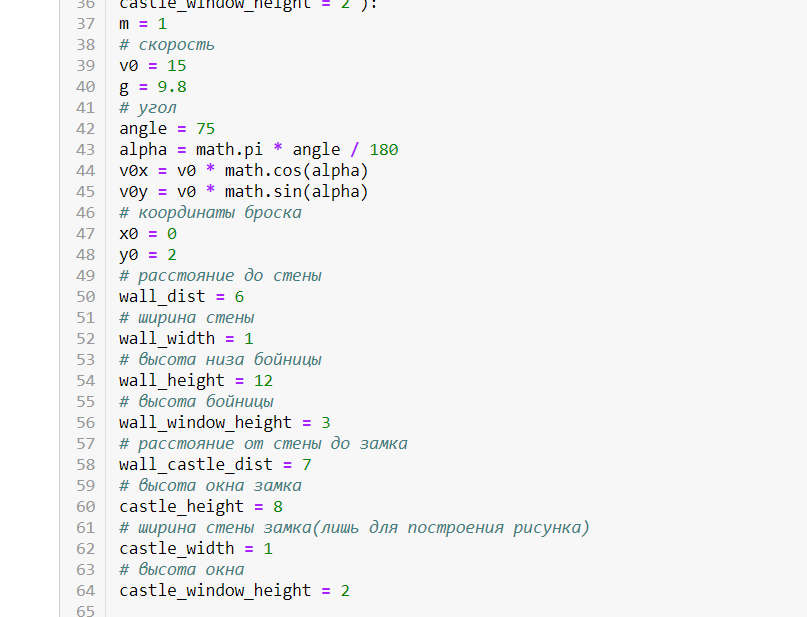